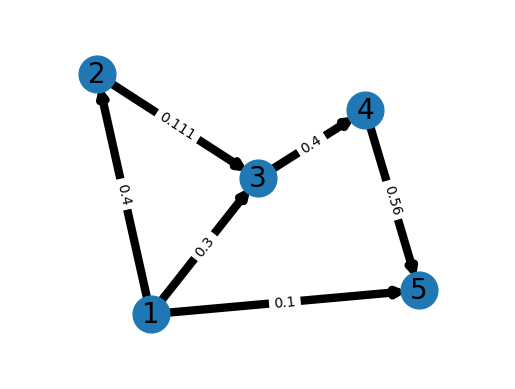

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

G = nx.DiGraph()
G.add_edge(1, 2, weight=0.4)
G.add_edge(1, 3, weight=0.3)
G.add_edge(1, 5, weight=0.1)
G.add_edge(2, 3, weight=0.111)
G.add_edge(3, 4, weight=0.4)
G.add_edge(4, 5, weight=0.56)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

nx.draw_networkx_edges(G, pos, width=6)
nx.draw_networkx_nodes(G, pos, node_size=700)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

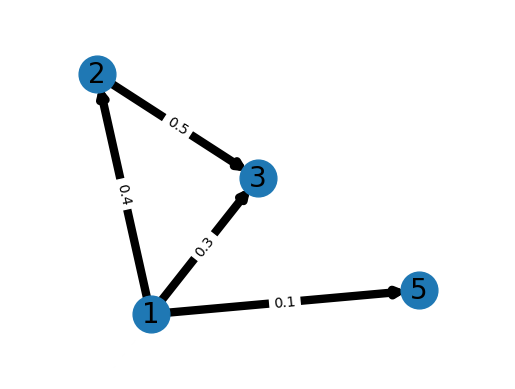

In [2]:

G2 = nx.DiGraph()
G2.add_edge(1, 2, weight=0.4)
G2.add_edge(1, 3, weight=0.3)
G2.add_edge(1, 5, weight=0.1)
G2.add_edge(2, 3, weight=0.5)

# explicitly set positions
pos2 = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

nx.draw_networkx_edges(G2, pos2, width=6)
nx.draw_networkx_nodes(G2, pos2, node_size=700)

# node labels
nx.draw_networkx_labels(G2, pos2, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels2 = nx.get_edge_attributes(G2, "weight")
nx.draw_networkx_edge_labels(G2, pos2, edge_labels2)

# Set margins for the axes so that nodes aren't clipped
ax2 = plt.gca()
ax2.margins(0.20)
plt.axis("off")
plt.show()

In [3]:
import torch
import numpy as np
from torch_geometric.data import Data, Dataset
import os.path as osp
import random
# Function to convert a single NetworkX graph to PyTorch Geometric Data
def convert_nx_to_pyg(nx_graph):
    # Get node indices
    node_indices = {node: i for i, node in enumerate(nx_graph.nodes())}
    
    # Get edge indices (2 x num_edges)
    edge_index = []
    edge_attr = []
    
    for u, v, data in nx_graph.edges(data=True):
        edge_index.append([node_indices[u], node_indices[v]])
        # If you have edge attributes, extract them here
        if data:
            # This assumes you have a 'weight' attribute for edges
            # Modify based on your edge attributes
            if 'weight' in data:
                edge_attr.append([data['weight']])
            else:
                edge_attr.append([1.0])  # Default weight
        else:
            edge_attr.append([1.0])  # Default weight
    
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    
    # Get node features
    x = []
    for node in nx_graph.nodes():
        # If you have node features, extract them here
        # This is just a placeholder; replace with your actual node features
        node_data = nx_graph.nodes[node]
        if node_data:
            # Example: Extract 'feature' attribute if it exists
            if 'feature' in node_data:
                x.append(node_data['feature'])
            else:
                # Use node degree as a simple feature if nothing else is available
                x.append([nx_graph.degree(node)])
        else:
            x.append([random.choice([0, 1, 2])])
    
    x = torch.tensor(x, dtype=torch.float)
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    
    # Create PyG Data object
    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
    
    return data


In [4]:
data = convert_nx_to_pyg(G)
data.x = F.one_hot(data.x.long().flatten()).float()

data2 = convert_nx_to_pyg(G2)
data2.x = F.one_hot(data2.x.long().flatten()).float()

NameError: name 'F' is not defined